# Spacy

En este notebook vamos a extraer texto desde una página web (web scraping) usando requests y BeautifulSoup, y luego procesarlo con spaCy, una de las librerías de NLP

Aplicaremos técnicas básicas como:

- Extracción de texto desde HTML

- Tokenización con spaCy

- Identificación de oraciones, palabras y entidades

Este flujo es ideal para tareas de análisis textual, minería de datos o simplemente explorar el lenguaje de forma automatizada.

In [1]:
# Scrapear una web y utilizar Spacy

!pip install spacy watermark -q
!python -m spacy download es_core_news_lg -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
import requests
from bs4 import BeautifulSoup
import spacy
from spacy import displacy
import random
import es_core_news_lg
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import nltk
from nltk.corpus import stopwords
import re

In [4]:
url = "https://es.wikipedia.org/wiki/Lionel_Messi"
contenido = requests.get(url).text
soup = BeautifulSoup(contenido, "html.parser")

In [7]:
h1 = soup.find_all("p")
parrafo_aleatorio = random.choice(h1)
print(parrafo_aleatorio.text)

El 18 de octubre, contra el Olympiacos en la Liga de Campeones, Messi llegó a su gol número 100 en todas las competiciones de clubes de la UEFA. Fue el primer jugador no europeo en lograrlo y el segundo detrás de Cristiano Ronaldo, aunque lo hizo en veintiún partidos menos.[311]​



In [34]:
# Modelo para procesar palabras en español
nlp = spacy.load("es_core_news_lg")
nlp = es_core_news_lg.load()

In [35]:
# Le aplicamos el modelo a nuestro parrafo aleatorio
doc = nlp(parrafo_aleatorio.text)

In [13]:
# Aplicamos lematizacion, es para ver la forma base de una palabra
print("Lematizacion")
for token in doc:
    if not token.is_punct and not token.is_space:
      print(f"'{token.text}' -> '{token.lemma_}'")

Lematizacion
'El' -> 'el'
'18' -> '18'
'de' -> 'de'
'octubre' -> 'octubre'
'contra' -> 'contra'
'el' -> 'el'
'Olympiacos' -> 'Olympiacos'
'en' -> 'en'
'la' -> 'el'
'Liga' -> 'Liga'
'de' -> 'de'
'Campeones' -> 'Campeones'
'Messi' -> 'Messi'
'llegó' -> 'llegar'
'a' -> 'a'
'su' -> 'su'
'gol' -> 'gol'
'número' -> 'número'
'100' -> '100'
'en' -> 'en'
'todas' -> 'todo'
'las' -> 'el'
'competiciones' -> 'competición'
'de' -> 'de'
'clubes' -> 'club'
'de' -> 'de'
'la' -> 'el'
'UEFA' -> 'UEFA'
'Fue' -> 'ser'
'el' -> 'el'
'primer' -> 'primero'
'jugador' -> 'jugador'
'no' -> 'no'
'europeo' -> 'europeo'
'en' -> 'en'
'lograrlo' -> 'lograr él'
'y' -> 'y'
'el' -> 'el'
'segundo' -> 'segundo'
'detrás' -> 'detrás'
'de' -> 'de'
'Cristiano' -> 'Cristiano'
'Ronaldo' -> 'Ronaldo'
'aunque' -> 'aunque'
'lo' -> 'él'
'hizo' -> 'hacer'
'en' -> 'en'
'veintiún' -> 'veintiún'
'partidos' -> 'partido'
'menos.[311]​' -> 'menos.[311]​'


In [36]:
# Vemos los cada uno de los tokens
tokens = [token.text for token in doc]
print(tokens)

['El', '18', 'de', 'octubre', ',', 'contra', 'el', 'Olympiacos', 'en', 'la', 'Liga', 'de', 'Campeones', ',', 'Messi', 'llegó', 'a', 'su', 'gol', 'número', '100', 'en', 'todas', 'las', 'competiciones', 'de', 'clubes', 'de', 'la', 'UEFA', '.', 'Fue', 'el', 'primer', 'jugador', 'no', 'europeo', 'en', 'lograrlo', 'y', 'el', 'segundo', 'detrás', 'de', 'Cristiano', 'Ronaldo', ',', 'aunque', 'lo', 'hizo', 'en', 'veintiún', 'partidos', 'menos.[311]\u200b', '\n']


In [37]:
# Etiquetado gramatical
for token in doc:
    print("Token:", token.text, ", Categoria gramatical:", token.pos_, ", Significado:",spacy.explain(token.pos_), ", Etiqueta:",token.tag_, ", Rol sintactico:",token.dep_)

Token: El , Categoria gramatical: DET , Significado: determiner , Etiqueta: DET , Rol sintactico: det
Token: 18 , Categoria gramatical: NUM , Significado: numeral , Etiqueta: NUM , Rol sintactico: obl
Token: de , Categoria gramatical: ADP , Significado: adposition , Etiqueta: ADP , Rol sintactico: case
Token: octubre , Categoria gramatical: NOUN , Significado: noun , Etiqueta: NOUN , Rol sintactico: compound
Token: , , Categoria gramatical: PUNCT , Significado: punctuation , Etiqueta: PUNCT , Rol sintactico: punct
Token: contra , Categoria gramatical: ADP , Significado: adposition , Etiqueta: ADP , Rol sintactico: case
Token: el , Categoria gramatical: DET , Significado: determiner , Etiqueta: DET , Rol sintactico: det
Token: Olympiacos , Categoria gramatical: PROPN , Significado: proper noun , Etiqueta: PROPN , Rol sintactico: nmod
Token: en , Categoria gramatical: ADP , Significado: adposition , Etiqueta: ADP , Rol sintactico: case
Token: la , Categoria gramatical: DET , Significado:

In [18]:
print("\n📈 Representación gráfica de dependencias:\n")
displacy.render(doc, style='dep', jupyter=True, options={'distance': 100})


📈 Representación gráfica de dependencias:



In [38]:
# Vemos las entidades propias
for ent in doc.ents:
  print(f'{ent.text} - {ent.label_} - {spacy.explain(ent.label_)}')

Olympiacos - ORG - Companies, agencies, institutions, etc.
Liga de Campeones - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Messi - PER - Named person or family.
UEFA - ORG - Companies, agencies, institutions, etc.
Cristiano Ronaldo - PER - Named person or family.


In [20]:
# Mostrar entidades con spacy
displacy.render(doc, style ='ent', jupyter = True)

In [22]:
# Descarga corpus español stopwords
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
# Funcion para limpiar texto

def limpiar_texto(texto):
  texto_minuscula = texto.lower()
  texto_limpio = re.sub(r'[^\w\s]', '', texto_minuscula)
  palabras = texto_limpio.split()
  palabras_importantes = []

  for palabra in palabras:
    if palabra not in stopwords_es:
      palabras_importantes.append(palabra)

  return palabras_importantes

texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

In [40]:
# Funcion para limpiar texto

def limpiar_texto(texto):

  palabras_a_eliminar = ['veces', 'base', 'de', 'central', 'marzo', 'marca', 'uso',
        'ocultar', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'lateral',
        'abril', 'ejemplo', 'agosto','julio','junio', 'marzo','mayo','octubre','diciembre','enero','febrero','septiembre','consultado']

  black_list = stopwords_es.union(palabras_a_eliminar)

  texto_minuscula = texto.lower()

  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula)

  lista_palabras = texto_sin_puntuacion.split()

  palabras_importantes = []

  for palabra in lista_palabras:
    if palabra not in black_list:
      palabras_importantes.append(palabra)

  return palabras_importantes

In [41]:
# Limpiamos nuestro parrafo con las funciones creadas

texto_completo = soup.get_text()

palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

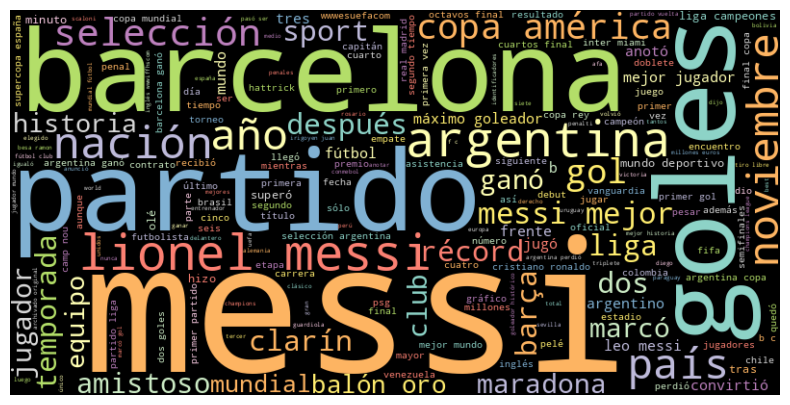

In [42]:
# Usamos Wordcloud para crear un grafico de palabras segun su repeticion

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Set3',
).generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()